In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory

# you can find the dataset here :
# https://www.kaggle.com/grassknoted/asl-alphabet
# The idea is to create a sign language translator
# for now, it only works for letter
# next step : add words ( dataset or maybe pictures of myself ? )
# It would also use OpenCV to make a real time translator
# Fo

In [2]:
#import train data
# validation_split = 0.2 so 80% of the images will be used to train the model
train_data = image_dataset_from_directory(r"C:\Users\Administrateur\Desktop\Sign language\asl_alphabet_train\asl_alphabet_train", 
                                                                 labels='inferred', label_mode='int', class_names=None,
                                                                 color_mode='rgb', batch_size=128, image_size=(50, 50), shuffle=True, 
                                                                 seed=123, validation_split=0.2, subset="training")

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [3]:
# import validation data
# will be used to test the model
validation_data = image_dataset_from_directory(r"C:\Users\Administrateur\Desktop\Sign language\asl_alphabet_train\asl_alphabet_train",
                                        labels='inferred', label_mode='int', class_names=None, color_mode='rgb', 
                                        batch_size=128, image_size=(50, 50), shuffle=True, seed=123, 
                                        validation_split=0.2, subset="validation")

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


In [4]:
model = Sequential()
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(29, activation = 'softmax'))

In [5]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [6]:
er = EarlyStopping(monitor="val_loss", mode="min", patience=5, verbose=1,
                  restore_best_weights=True)

In [7]:
sign_model = model.fit(train_data, validation_data=validation_data,
                       epochs=25, callbacks=[er])

Epoch 1/25
544/544 [==============================] - 309s 566ms/step - loss: 1.2174 - accuracy: 0.6288 - val_loss: 0.2494 - val_accuracy: 0.9282
Epoch 2/25
544/544 [==============================] - 310s 568ms/step - loss: 0.2328 - accuracy: 0.9221 - val_loss: 0.0958 - val_accuracy: 0.9725
Epoch 3/25
544/544 [==============================] - 306s 562ms/step - loss: 0.1163 - accuracy: 0.9605 - val_loss: 0.0416 - val_accuracy: 0.9877
Epoch 4/25
544/544 [==============================] - 304s 558ms/step - loss: 0.0792 - accuracy: 0.9730 - val_loss: 0.0181 - val_accuracy: 0.9956
Epoch 5/25
544/544 [==============================] - 306s 562ms/step - loss: 0.0582 - accuracy: 0.9808 - val_loss: 0.0150 - val_accuracy: 0.9963
Epoch 6/25
544/544 [==============================] - 311s 570ms/step - loss: 0.0447 - accuracy: 0.9852 - val_loss: 0.0128 - val_accuracy: 0.9967
Epoch 7/25
544/544 [==============================] - 318s 584ms/step - loss: 0.0397 - accuracy: 0.9864 - val_loss: 0.0101 -

In [8]:
model.evaluate(train_data)

544/544 [==============================] - 87s 158ms/step - loss: 0.0015 - accuracy: 0.9996


[0.0014996217796579003, 0.9996408224105835]

In [10]:
model.evaluate(validation_data)

136/136 [==============================] - 21s 150ms/step - loss: 0.0020 - accuracy: 0.9995


[0.0020261346362531185, 0.9994827508926392]

In [11]:
# df with the metrics of our model
df_loss = pd.DataFrame(sign_model.history)

<AxesSubplot:>

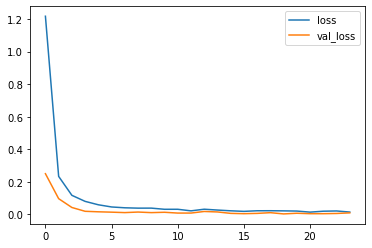

In [12]:
# no overfitting ! 
df_loss[["loss", "val_loss"]].plot()

<AxesSubplot:>

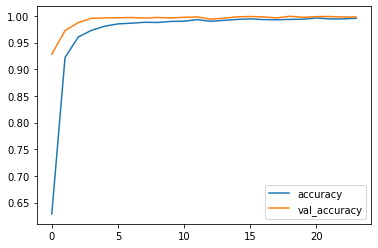

In [13]:
df_loss[["accuracy", "val_accuracy"]].plot()

In [14]:
# dict with labels, we'll use it to get the prediction
dict_labels = {0:"a",1:"b",2:"c",3:"d",4:"e",5:"f",6:"g",7:"h",8:"i",9:"j",10:"k",11:"l",12:"m",13:"n",
               14:"o",15:"p",16:"q",17:"r",18:"s",19:"t",20:"u",21:"v",22:"w",23:"x",24:"y",25:"z",
              26:"del", 27:"nothing", 28:"space"}

[6]
g


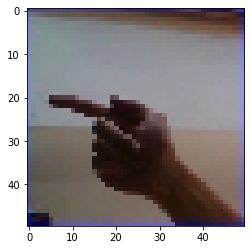

In [15]:
image_path = r"C:\Users\Administrateur\Desktop\Sign language\asl_alphabet_train\asl_alphabet_train\G\G1.jpg"
# load image with same target_size as img_size for our model
new_img = image.load_img(image_path, target_size=(50, 50))
# from img to array using PIL 
img = image.img_to_array(new_img)
# expand number of dimension of our array
# for exemple if you have X of shape (2,)
# np.expand_dims(X, axis=0)
# will give you X2 of shape (1,2)
# we use it so the image shape match the shape needed by our model
img = np.expand_dims(img, axis=0)
# get the prediction
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
# print prediction of our model
print(prediction)
# print the letter corresponding to the prediction
print(dict_labels[prediction[0]])
plt.imshow(new_img)

[25]
z


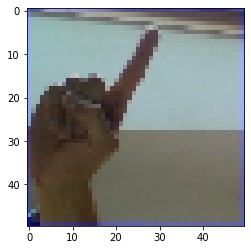

In [16]:
image_path = r"C:\Users\Administrateur\Desktop\Sign language\asl_alphabet_train\asl_alphabet_train\Z\Z3.jpg"
new_img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(dict_labels[prediction[0]])
plt.imshow(new_img)

[17]
r


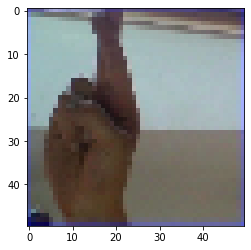

In [17]:
image_path = r"C:\Users\Administrateur\Desktop\Sign language\asl_alphabet_train\asl_alphabet_train\R\R9.jpg"
new_img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(dict_labels[prediction[0]])
plt.imshow(new_img)